In [247]:
import os

from glob import glob
from tqdm import tqdm

import pandas as pd
from tabulate import tabulate
import latextable
import cv2
import matplotlib.pyplot as plt
import numpy as np

# OBS vs NMS - Zebra

In [343]:
df = pd.read_csv('ablation/Zebra-OBS-iouths.csv')
df = df[['method', 'dataset', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
df['method'] = df.apply(lambda x: x.dataset.split('-')[1], axis=1)
df['dataset'] = df.apply(lambda x: x.dataset.split('-')[-1].replace('th0', '0.'), axis=1)
df = df.rename(columns={'dataset':'iou_th'})
df = df.sort_values(by='AP', ascending=False, ignore_index=True)
df

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,OBS,0.2,75.874074,94.584619,15496.0,1913.0,746.0,89.011431,95.406970,92.098303
1,OBS,0.3,75.870607,94.578987,15500.0,2021.0,742.0,88.465270,95.431597,91.816486
2,OBS,0.4,75.864169,94.567328,15502.0,2197.0,740.0,87.586869,95.443911,91.346749
3,OBS,0.5,75.856915,94.553392,15503.0,2397.0,739.0,86.608939,95.450068,90.814832
4,OBS,0.6,75.847882,94.540157,15503.0,2647.0,739.0,85.415978,95.450068,90.154687
5,OBS,0.7,75.837856,94.524348,15503.0,2865.0,739.0,84.402221,95.450068,89.586825
6,NMS,0.9,75.824211,94.270571,15514.0,4213.0,728.0,78.643484,95.517793,86.263171
7,NONE,NONE,75.823189,94.269308,15514.0,4237.0,728.0,78.547922,95.517793,86.205651
8,OBS,0.8,75.797440,94.462536,15503.0,3123.0,739.0,83.233115,95.450068,88.923942
9,NMS,0.8,75.759740,94.272101,15513.0,4043.0,729.0,79.326038,95.511636,86.669646


In [303]:
nms = df[df.method=='NMS']
nms = nms[nms.iou_th.isin(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])]
nms["iou_th"] = pd.to_numeric(nms["iou_th"])
nms = nms.sort_values(by=['iou_th'], ignore_index=True)
nms

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NMS,0.1,52.194853,73.926143,12985.0,2358.0,3257.0,84.631428,79.947051,82.222574
1,NMS,0.2,65.989117,88.672346,14666.0,2216.0,1576.0,86.873593,90.296761,88.552107
2,NMS,0.3,72.572324,93.225332,15234.0,2539.0,1008.0,85.714286,93.793868,89.572248
3,NMS,0.4,74.309985,93.398177,15379.0,2847.0,863.0,84.379458,94.686615,89.236393
4,NMS,0.5,75.291181,94.260589,15458.0,3124.0,784.0,83.188031,95.173008,88.777854
5,NMS,0.6,75.588321,94.279772,15496.0,3424.0,746.0,81.902748,95.406970,88.140606
6,NMS,0.7,75.682088,94.275678,15507.0,3750.0,735.0,80.526562,95.474695,87.365841
7,NMS,0.8,75.759740,94.272101,15513.0,4043.0,729.0,79.326038,95.511636,86.669646
8,NMS,0.9,75.824211,94.270571,15514.0,4213.0,728.0,78.643484,95.517793,86.263171


In [304]:
obs = df[df.method=='OBS']
obs = obs[~obs.iou_th.isin(['check'])]
obs["iou_th"] = pd.to_numeric(obs["iou_th"])
obs = obs.sort_values(by=['iou_th'], ignore_index=True)
obs

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,OBS,0.1,75.713671,94.560712,15458.0,1802.0,784.0,89.559676,95.173008,92.281058
1,OBS,0.2,75.874074,94.584619,15496.0,1913.0,746.0,89.011431,95.406970,92.098303
2,OBS,0.3,75.870607,94.578987,15500.0,2021.0,742.0,88.465270,95.431597,91.816486
3,OBS,0.4,75.864169,94.567328,15502.0,2197.0,740.0,87.586869,95.443911,91.346749
4,OBS,0.5,75.856915,94.553392,15503.0,2397.0,739.0,86.608939,95.450068,90.814832
5,OBS,0.6,75.847882,94.540157,15503.0,2647.0,739.0,85.415978,95.450068,90.154687
6,OBS,0.7,75.837856,94.524348,15503.0,2865.0,739.0,84.402221,95.450068,89.586825
7,OBS,0.8,75.797440,94.462536,15503.0,3123.0,739.0,83.233115,95.450068,88.923942
8,OBS,0.9,75.755244,94.394933,15503.0,3373.0,739.0,82.130748,95.450068,88.290905


In [305]:
baseline = df[df.method=='NONE']
baseline


df_zebra = pd.concat([baseline, nms, obs], ignore_index=True)
df_zebra['dataset'] = 'ZebraFish'
df_zebra

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1,dataset
0,NONE,NONE,75.823189,94.269308,15514.0,4237.0,728.0,78.547922,95.517793,86.205651,ZebraFish
1,NMS,0.1,52.194853,73.926143,12985.0,2358.0,3257.0,84.631428,79.947051,82.222574,ZebraFish
2,NMS,0.2,65.989117,88.672346,14666.0,2216.0,1576.0,86.873593,90.296761,88.552107,ZebraFish
3,NMS,0.3,72.572324,93.225332,15234.0,2539.0,1008.0,85.714286,93.793868,89.572248,ZebraFish
4,NMS,0.4,74.309985,93.398177,15379.0,2847.0,863.0,84.379458,94.686615,89.236393,ZebraFish
5,NMS,0.5,75.291181,94.260589,15458.0,3124.0,784.0,83.188031,95.173008,88.777854,ZebraFish
6,NMS,0.6,75.588321,94.279772,15496.0,3424.0,746.0,81.902748,95.406970,88.140606,ZebraFish
7,NMS,0.7,75.682088,94.275678,15507.0,3750.0,735.0,80.526562,95.474695,87.365841,ZebraFish
8,NMS,0.8,75.759740,94.272101,15513.0,4043.0,729.0,79.326038,95.511636,86.669646,ZebraFish
9,NMS,0.9,75.824211,94.270571,15514.0,4213.0,728.0,78.643484,95.517793,86.263171,ZebraFish


# OBS vs NMS - DroneCrowd

In [308]:
df = pd.read_csv('ablation/DC-OBS-iouths.csv')
df = df[['method', 'dataset', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
df['method'] = df.apply(lambda x: x.dataset.split('-')[1], axis=1)
df['dataset'] = df.apply(lambda x: x.dataset.split('-')[-1].replace('th0', '0.'), axis=1)
df = df.rename(columns={'dataset':'iou_th'})
df = df.sort_values(by='iou_th', ignore_index=True)


# TODO NMS & NONE
df_dc = df
df_dc['dataset'] = 'DroneCrowd'
df_dc

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1,dataset
0,OBS,0.1,16.167273,39.777863,549742,423767,632196,56.470151,46.511915,51.009559,DroneCrowd
1,OBS,0.2,17.848492,44.061565,607670,473276,574268,56.216499,51.413018,53.707570,DroneCrowd
2,OBS,0.3,19.204799,47.207752,650876,512404,531062,55.951791,55.068540,55.506652,DroneCrowd
3,OBS,0.4,20.437798,49.712123,686123,547309,495815,55.627144,58.050676,56.813076,DroneCrowd
4,OBS,0.5,21.285475,51.705927,712824,592468,469114,54.610309,60.309762,57.318704,DroneCrowd
5,OBS,0.6,21.838348,52.703307,730785,662206,451153,52.461574,61.829385,56.761565,DroneCrowd
6,OBS,0.7,22.140117,53.344496,741357,730491,440581,50.369128,62.723848,55.871649,DroneCrowd
7,OBS,0.8,22.142481,53.169715,745938,781543,436000,48.834519,63.111432,55.062580,DroneCrowd
8,OBS,0.9,22.075346,53.067319,747884,829629,434054,47.409055,63.276077,54.205275,DroneCrowd


# OBS vs NMS - SeaDronesSee

## plots all_dses

In [325]:
df = pd.read_csv('ablation/SDS-OBS-iouths-different-conf.csv')
df = df[['method', 'conf_th', 'iou_th', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
df = df[df.conf_th==0.1]
df = df[[x for x in df.columns if x!='conf_th']]
df['dataset'] = 'SeaDronesSee'
df_sds = df

In [326]:
all_dses = pd.concat([df_zebra, df_dc, df_sds], ignore_index=True)
all_dses.to_csv('ablation/NMS-OBS-all-datasets.csv', index=False)
all_dses

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1,dataset
0,NONE,NONE,75.823189,94.269308,15514.0,4237.0,728.0,78.547922,95.517793,86.205651,ZebraFish
1,NMS,0.1,52.194853,73.926143,12985.0,2358.0,3257.0,84.631428,79.947051,82.222574,ZebraFish
2,NMS,0.2,65.989117,88.672346,14666.0,2216.0,1576.0,86.873593,90.296761,88.552107,ZebraFish
3,NMS,0.3,72.572324,93.225332,15234.0,2539.0,1008.0,85.714286,93.793868,89.572248,ZebraFish
4,NMS,0.4,74.309985,93.398177,15379.0,2847.0,863.0,84.379458,94.686615,89.236393,ZebraFish
5,NMS,0.5,75.291181,94.260589,15458.0,3124.0,784.0,83.188031,95.173008,88.777854,ZebraFish
6,NMS,0.6,75.588321,94.279772,15496.0,3424.0,746.0,81.902748,95.406970,88.140606,ZebraFish
7,NMS,0.7,75.682088,94.275678,15507.0,3750.0,735.0,80.526562,95.474695,87.365841,ZebraFish
8,NMS,0.8,75.759740,94.272101,15513.0,4043.0,729.0,79.326038,95.511636,86.669646,ZebraFish
9,NMS,0.9,75.824211,94.270571,15514.0,4213.0,728.0,78.643484,95.517793,86.263171,ZebraFish


### F1(iou_th)

/tmp/ipykernel_63263/4166132446.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iou_th = df.apply(lambda x: float(x.iou_th), axis=1)
/tmp/ipykernel_63263/4166132446.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iou_th = df.apply(lambda x: float(x.iou_th), axis=1)
/tmp/ipykernel_63263/4166132446.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

<Figure size 432x288 with 0 Axes>

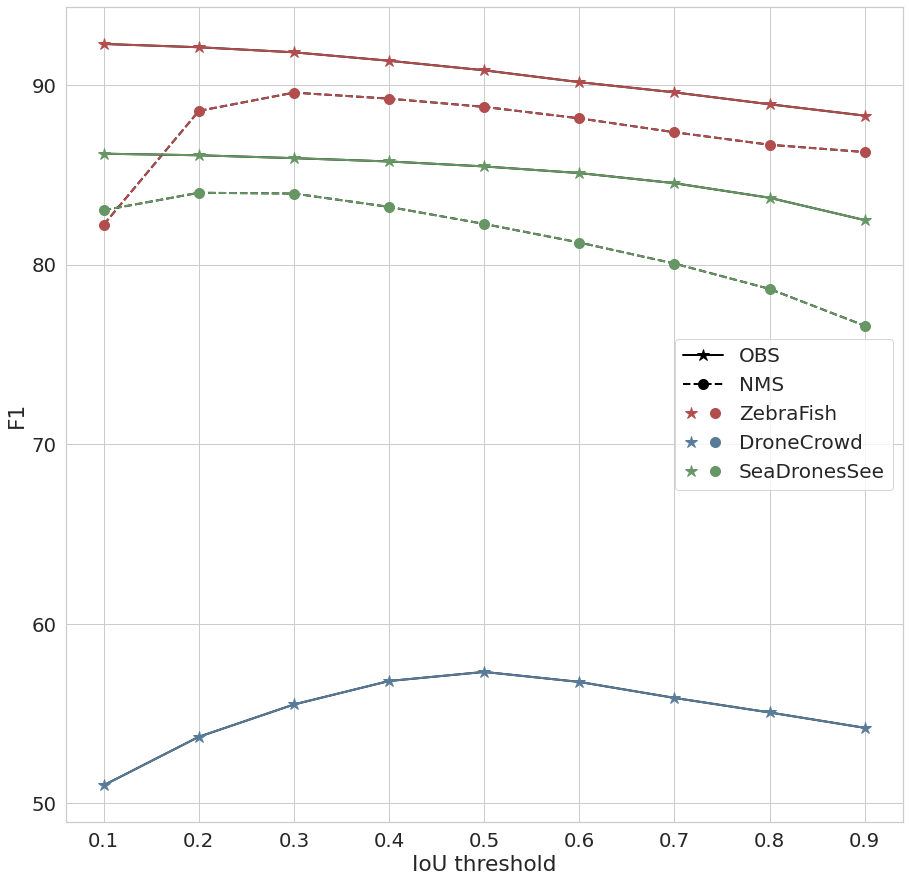

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

all_dses_ = all_dses[all_dses.method!='NONE']
ious = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
datasets = all_dses_.dataset.unique()

plt.tight_layout()
plt.figure(figsize=(15,15))
ax  = plt.gca()

sns.set(style = 'whitegrid', font_scale = 1.8)
palette = sns.color_palette("Set1", n_colors=9, desat=0.5)

obsm, nmsm, confs_ = [],[],[]

for i, dataset in enumerate(datasets):
    
    df = all_dses_[all_dses_.dataset==dataset]
    df.iou_th = df.apply(lambda x: float(x.iou_th), axis=1)
    df = df.sort_values(by='iou_th', ignore_index=True)
    
    nms_df = df[df.method=='NMS']
    obs_df = df[df.method=='OBS']
    
    
    li_nms, = plt.plot(nms_df.iou_th.values, nms_df.F1.values, color='black', linestyle='--', marker='', linewidth=2, label=dataset)
    li_obs, = plt.plot(obs_df.iou_th.values, obs_df.F1.values, color='black', linestyle='-', marker='', linewidth=2)
    
    li_nms_, = plt.plot(nms_df.iou_th.values, nms_df.F1.values, color=palette[i], linestyle='--', marker='', linewidth=2, label=dataset)
    li_obs_, = plt.plot(obs_df.iou_th.values, obs_df.F1.values, color=palette[i], linestyle='-', marker='', linewidth=2)

    ma_nms, = plt.plot(nms_df.iou_th.values, nms_df.F1.values, color=palette[i], marker='o',  linestyle='', markersize=10, label='NMS' if i==0 else '')
    ma_obs, = plt.plot(obs_df.iou_th.values, obs_df.F1.values, color=palette[i], marker='*',  linestyle='', markersize=12, label='OBS' if i==0 else '')
    obsm.append(ma_obs)
    nmsm.append(ma_nms)
    
plt.xlabel('IoU threshold')
plt.ylabel('F1')

labels = ['OBS', 'NMS']+[f'{dataset}' for dataset in datasets]

art =  [[ma_obs, li_obs],[ma_nms, li_nms]]
for obsm_, nmsm_ in zip(obsm, nmsm):
    art.append((obsm_, nmsm_))
ax.legend(art, labels, handler_map={list: HandlerTuple(1), tuple: HandlerTuple(2)}, fontsize=20)


leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')


plt.savefig('../../plots/OBS-vs-NMS-F1-datasets.png', bbox_inches='tight', pad_inches=0)
plt.savefig('../../plots/OBS-vs-NMS-F1-datasets.eps', bbox_inches='tight', pad_inches=0)

### bar - fixed iou_th

In [341]:
ths_obs = {"ZebraFish": 0.1, "SeaDronesSee": 0.1, "DroneCrowd": 0.5}
ths_nms = {"ZebraFish": 0.3, "SeaDronesSee": 0.2, "DroneCrowd": 0.5} # TODO iou_th NMS + DC


to_concat = []
for ds, obs_th in ths_obs.items():
    
    nms_th = ths_nms[ds]
    # print(all_dses)
    df_ = all_dses_[(all_dses_.dataset==ds) & (((all_dses_.method=='NMS') & (pd.to_numeric(all_dses_.iou_th)==nms_th)) | ((all_dses_.method=='OBS') & (pd.to_numeric(all_dses_.iou_th)==obs_th)))]
    to_concat.append(df_)
    
to_concat = to_concat+[all_dses[all_dses.method=='NONE']]
all_compare = pd.concat(to_concat, ignore_index=True)
all_compare = all_compare.sort_values(by=['dataset', 'method'], ascending=False, ignore_index=True)
all_compare = all_compare[['dataset']+[x for x in all_compare.columns[:-1]]]
all_compare

# metrics_roi_track = metrics_roi_track.sort_values(by='input size', key = lambda col: [int(x.split('x')[0]) for x in col])

,dataset,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,ZebraFish,OBS,0.1,75.713671,94.560712,15458.0,1802.0,784.0,89.559676,95.173008,92.281058
1,ZebraFish,NONE,NONE,75.823189,94.269308,15514.0,4237.0,728.0,78.547922,95.517793,86.205651
2,ZebraFish,NMS,0.3,72.572324,93.225332,15234.0,2539.0,1008.0,85.714286,93.793868,89.572248
3,SeaDronesSee,OBS,0.1,50.555447,83.907805,42034.0,7847.0,5644.0,84.268559,88.162255,86.171445
4,SeaDronesSee,NONE,NONE,44.623804,72.842434,42387.0,25318.0,5291.0,62.605421,88.902639,73.471829
5,SeaDronesSee,NMS,0.2,46.061499,82.233822,41402.0,9501.0,6276.0,81.335088,86.836696,83.995902
6,DroneCrowd,OBS,0.5,21.285475,51.705927,712824.0,592468.0,469114.0,54.610309,60.309762,57.318704


In [342]:
out_table = '../../tables/all-datasets-NMS-OBS-NONE.tex'

header = all_compare.columns.tolist()

rows = []
for i in range(len(all_compare)):
    row = all_compare.iloc[i].values.tolist()
    formatted_row = []
    for j,x in enumerate(row):
        if isinstance(x, str) or isinstance(x, np.int64):
            formatted_row.append(x)
            continue
        elif isinstance(x, float):
            formatted_row.append(f'{x:.1f}')
        else:
            print(type(x))

    rows.append(formatted_row)

open(out_table, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))
print(tabulate(rows, header))

dataset       method    iou_th      AP    AP50      TP      FP      FN     P     R    F1
------------  --------  --------  ----  ------  ------  ------  ------  ----  ----  ----
ZebraFish     OBS       0.1       75.7    94.6   15458    1802     784  89.6  95.2  92.3
ZebraFish     NONE      NONE      75.8    94.3   15514    4237     728  78.5  95.5  86.2
ZebraFish     NMS       0.3       72.6    93.2   15234    2539    1008  85.7  93.8  89.6
SeaDronesSee  OBS       0.1       50.6    83.9   42034    7847    5644  84.3  88.2  86.2
SeaDronesSee  NONE      NONE      44.6    72.8   42387   25318    5291  62.6  88.9  73.5
SeaDronesSee  NMS       0.2       46.1    82.2   41402    9501    6276  81.3  86.8  84
DroneCrowd    OBS       0.5       21.3    51.7  712824  592468  469114  54.6  60.3  57.3


/tmp/ipykernel_63263/1838018201.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../tables/all-datasets-NMS-OBS-NONE.tex' mode='w' encoding='UTF-8'>
  open(out_table, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))


## SDS - OBS, NMS, all confs and ious

In [309]:
# df = pd.read_csv('ablation/SDS-OBS-iouths.csv')
df = pd.read_csv('ablation/SDS-OBS-iouths-different-conf.csv')
df = df[['method', 'conf_th', 'iou_th', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
df

,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NMS,0.1,0.1,43.362590,80.067881,40395,9233,7283,81.395583,84.724611,83.026740
1,NMS,0.2,0.1,43.362590,80.067881,40614,6997,7064,85.303816,85.183942,85.243837
2,NMS,0.3,0.1,43.362590,80.067881,40604,5863,7074,87.382443,85.162968,86.258431
3,NMS,0.4,0.1,43.362590,80.067881,40420,5032,7258,88.928980,84.777046,86.803393
4,NMS,0.5,0.1,43.362590,80.067881,40013,4336,7665,90.223004,83.923403,86.959262
...,...,...,...,...,...,...,...,...,...,...,...
166,OBS,0.5,0.9,49.791419,82.524503,41353,6072,6325,87.196626,86.733923,86.964659
167,OBS,0.6,0.9,49.791419,82.524503,40411,5041,7267,88.909179,84.758169,86.784065
168,OBS,0.7,0.9,49.791419,82.524503,38422,3632,9256,91.363485,80.586434,85.637231
169,OBS,0.8,0.9,49.791419,82.524503,30829,1556,16849,95.195306,64.660850,77.011853


In [249]:
nms = df[df.method=='NMS']
nms = nms[nms.iou_th.isin(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])]
nms["iou_th"] = pd.to_numeric(nms["iou_th"])
nms = nms.sort_values(by=['iou_th', 'conf_th'], ignore_index=True)
nms

,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NMS,0.1,0.1,43.362590,80.067881,40395,9233,7283,81.395583,84.724611,83.026740
1,NMS,0.2,0.1,43.362590,80.067881,40614,6997,7064,85.303816,85.183942,85.243837
2,NMS,0.3,0.1,43.362590,80.067881,40604,5863,7074,87.382443,85.162968,86.258431
3,NMS,0.4,0.1,43.362590,80.067881,40420,5032,7258,88.928980,84.777046,86.803393
4,NMS,0.5,0.1,43.362590,80.067881,40013,4336,7665,90.223004,83.923403,86.959262
...,...,...,...,...,...,...,...,...,...,...,...
76,NMS,0.5,0.9,47.079604,77.431771,41381,11671,6297,78.000829,86.792651,82.162216
77,NMS,0.6,0.9,47.079604,77.431771,40455,10332,7223,79.656211,84.850455,82.171330
78,NMS,0.7,0.9,47.079604,77.431771,38473,8253,9205,82.337457,80.693402,81.507140
79,NMS,0.8,0.9,47.079604,77.431771,30874,4845,16804,86.435790,64.755233,74.041033


In [250]:
obs = df[df.method=='OBS']
obs["iou_th"] = pd.to_numeric(obs["iou_th"])
obs = obs.sort_values(by=['iou_th', 'conf_th'], ignore_index=True)
obs

/tmp/ipykernel_63263/4143379980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs["iou_th"] = pd.to_numeric(obs["iou_th"])


,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,OBS,0.1,0.1,50.555447,83.907805,42034,7847,5644,84.268559,88.162255,86.171445
1,OBS,0.2,0.1,50.555447,83.907805,42074,5688,5604,88.090951,88.246151,88.168483
2,OBS,0.3,0.1,50.555447,83.907805,41967,4670,5711,89.986491,88.021729,88.993267
3,OBS,0.4,0.1,50.555447,83.907805,41706,3944,5972,91.360350,87.474307,89.375107
4,OBS,0.5,0.1,50.555447,83.907805,41222,3378,6456,92.426009,86.459164,89.343072
...,...,...,...,...,...,...,...,...,...,...,...
76,OBS,0.5,0.9,49.791419,82.524503,41353,6072,6325,87.196626,86.733923,86.964659
77,OBS,0.6,0.9,49.791419,82.524503,40411,5041,7267,88.909179,84.758169,86.784065
78,OBS,0.7,0.9,49.791419,82.524503,38422,3632,9256,91.363485,80.586434,85.637231
79,OBS,0.8,0.9,49.791419,82.524503,30829,1556,16849,95.195306,64.660850,77.011853


In [251]:
baseline = df[df.method=='NONE']
baseline = baseline.sort_values(by=['conf_th'], ignore_index=True)
baseline

,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NONE,0.1,NONE,44.623804,72.842434,42387,25318,5291,62.605421,88.902639,73.471829
1,NONE,0.2,NONE,44.623804,72.842434,42320,21053,5358,66.779228,88.762113,76.217234
2,NONE,0.3,NONE,44.623804,72.842434,42165,19137,5513,68.782421,88.437015,77.381171
3,NONE,0.4,NONE,44.623804,72.842434,41893,17700,5785,70.298525,87.866521,78.106851
4,NONE,0.5,NONE,44.623804,72.842434,41403,16344,6275,71.697231,86.838794,78.544937
5,NONE,0.6,NONE,44.623804,72.842434,40472,14863,7206,73.139966,84.886111,78.576490
6,NONE,0.7,NONE,44.623804,72.842434,38481,12339,9197,75.720189,80.710181,78.135597
7,NONE,0.8,NONE,44.623804,72.842434,30875,7239,16803,81.006979,64.757330,71.976408
8,NONE,0.9,NONE,44.623804,72.842434,8202,737,39476,91.755230,17.202903,28.973630


### PR curves x N

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

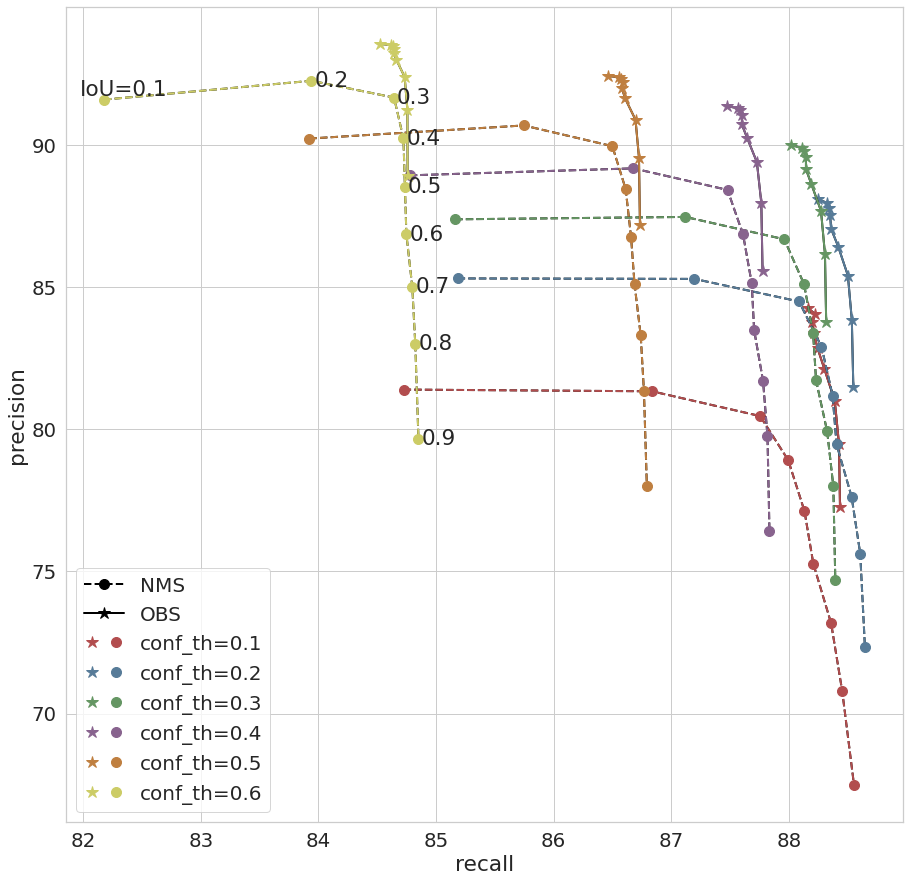

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ious = nms.iou_th.unique()
confs = nms.conf_th.unique()
markers = ['o', 'v', '^', '*', '4', 'P', 'p', 'X', 'H']

plt.tight_layout()
plt.figure(figsize=(15,15))
ax  = plt.gca()

sns.set(style = 'whitegrid', font_scale = 1.8)
palette = sns.color_palette("Set1", n_colors=9, desat=0.5)

obsm, nmsm, confs_ = [],[],[]

for i, conf in enumerate(confs):
    if conf>0.6:
        continue
    confs_.append(conf)
    nms_ = nms[nms.conf_th==conf]
    obs_ = obs[obs.conf_th==conf]
    
    nms_ious = nms_.iou_th.values
    obs_ious = obs_.iou_th.values
#     print(nms_ious)
#     print(obs_ious)
    
    nms_ys = nms_.P.values
    nms_xs = nms_.R.values
    
    obs_ys = obs_.P.values
    obs_xs = obs_.R.values
    
    
    
    li_nms, = plt.plot(nms_xs, nms_ys, color='black', linestyle='--', marker='', linewidth=2, label=f'conf_th={conf}') #, label=f'NMS iou_th={iou}')
    li_obs, = plt.plot(obs_xs, obs_ys, color='black', linestyle='-', marker='', linewidth=2)
    
    li_nms_, = plt.plot(nms_xs, nms_ys, color=palette[i], linestyle='--', marker='', linewidth=2, label=f'conf_th={conf}') #, label=f'NMS iou_th={iou}')
    li_obs_, = plt.plot(obs_xs, obs_ys, color=palette[i], linestyle='-', marker='', linewidth=2) #, label=f'NMS iou_th={iou}')
    # plt.plot(nms_xs, nms_ys, color=palette[i], marker='x', linewidth=2, markersize=8, label=f'NMS conf_th={conf}')
    # plt.plot(obs_xs, obs_ys, color=palette[i], marker='o', linewidth=2, markersize=8, label=f'OBS conf_th={conf}')
    ma_nms, = plt.plot(nms_xs, nms_ys, color=palette[i], marker='o',  linestyle='', markersize=10, label='NMS' if i==0 else '') #, label=f'NMS iou_th={iou}')
    ma_obs, = plt.plot(obs_xs, obs_ys, color=palette[i], marker='*',  linestyle='', markersize=12, label='OBS' if i==0 else '') #, label=f'NMS iou_th={iou}')
    # print(ma_nms[0])
    obsm.append(ma_obs)
    nmsm.append(ma_nms)
    # break
    
    if i == 5:
        line = li_nms_
        
        for i, (x, y) in enumerate(zip(line.get_xdata()[1:-1], line.get_ydata()[1:-1])):
            label = "{:.1f}".format(nms_ious[i+1])
            ax.annotate(label,(x, y), xytext=(20, -10), textcoords="offset points", ha='center', va='bottom')  
            
        x = line.get_xdata()[-1]
        y = line.get_ydata()[-1]
        label = "{:.1f}".format(nms_ious[-1])
        ax.annotate(label,(x, y), xytext=(20, -10), textcoords="offset points", ha='center', va='bottom')  
        
        line = li_nms_
        x = line.get_xdata()[0]
        y = line.get_ydata()[0]
        label = "IoU={:.1f}".format(nms_ious[0])
        ax.annotate(label,(x, y), xytext=(20, 0), textcoords="offset points", ha='center', va='bottom')  
    
    
plt.xlabel('recall')
plt.ylabel('precision')

labels = ['NMS', 'OBS']+[f'conf_th={c:.1f}' for c in confs_]

art =  [[ma_nms, li_nms], [ma_obs, li_obs]]
for obsm_, nmsm_ in zip(obsm, nmsm):
    art.append((obsm_, nmsm_))
ax.legend(art, labels, handler_map={list: HandlerTuple(1), tuple: HandlerTuple(2)}, fontsize=20)


leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')


plt.savefig('../../plots/OBS-vs-NMS-PR.png', bbox_inches='tight', pad_inches=0)
plt.savefig('../../plots/OBS-vs-NMS-PR.eps', bbox_inches='tight', pad_inches=0)

### F1 curves x N (N - num_iou_ths)

<Figure size 432x288 with 0 Axes>

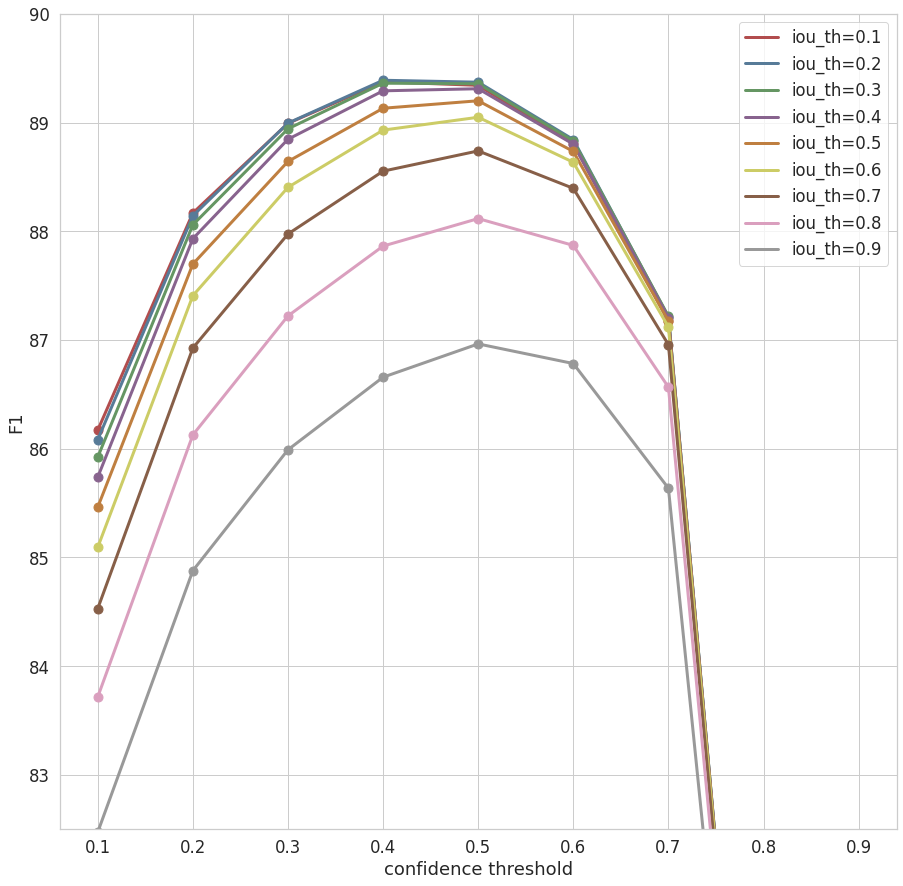

In [235]:
ious = nms.iou_th.unique()
confs = nms.conf_th.unique()
markers = ['o', 'v', '^', '*', '4', 'P', 'p', 'X', 'H']

plt.tight_layout()
plt.figure(figsize=(15,15))
ax  = plt.gca()

sns.set(style = 'whitegrid', font_scale = 1.5)
palette = sns.color_palette("Set1", n_colors=9, desat=0.5)

for i, iou in enumerate(ious):
    nms_ = nms[nms.iou_th==iou]
    obs_ = obs[obs.iou_th==iou]
    
    nms_xs = nms_.conf_th.values
    nms_ys = nms_.F1.values
    
    obs_xs = obs_.conf_th.values
    obs_ys = obs_.F1.values
    
    
    # ma_nms = plt.plot(nms_xs, nms_ys, color=palette[i], marker='X',  linestyle='', markersize=9, label='NMS' if i==0 else '')
    ma_obs = plt.plot(obs_xs, obs_ys, color=palette[i], marker='o',  linestyle='', markersize=9)#, label='OBS' if i==0 else '')
    
    # li_nms = plt.plot(nms_xs, nms_ys, color=palette[i], marker='', linewidth=3, label=f'iou_th={iou}')
    li_obs = plt.plot(obs_xs, obs_ys, color=palette[i], marker='', linewidth=3, label=f'iou_th={iou}')
    
    
plt.xlabel('confidence threshold')
plt.ylabel('F1')
handles, labels = ax.get_legend_handles_labels()
plt.ylim([82.5, 90])
_ = plt.legend()

<Figure size 432x288 with 0 Axes>

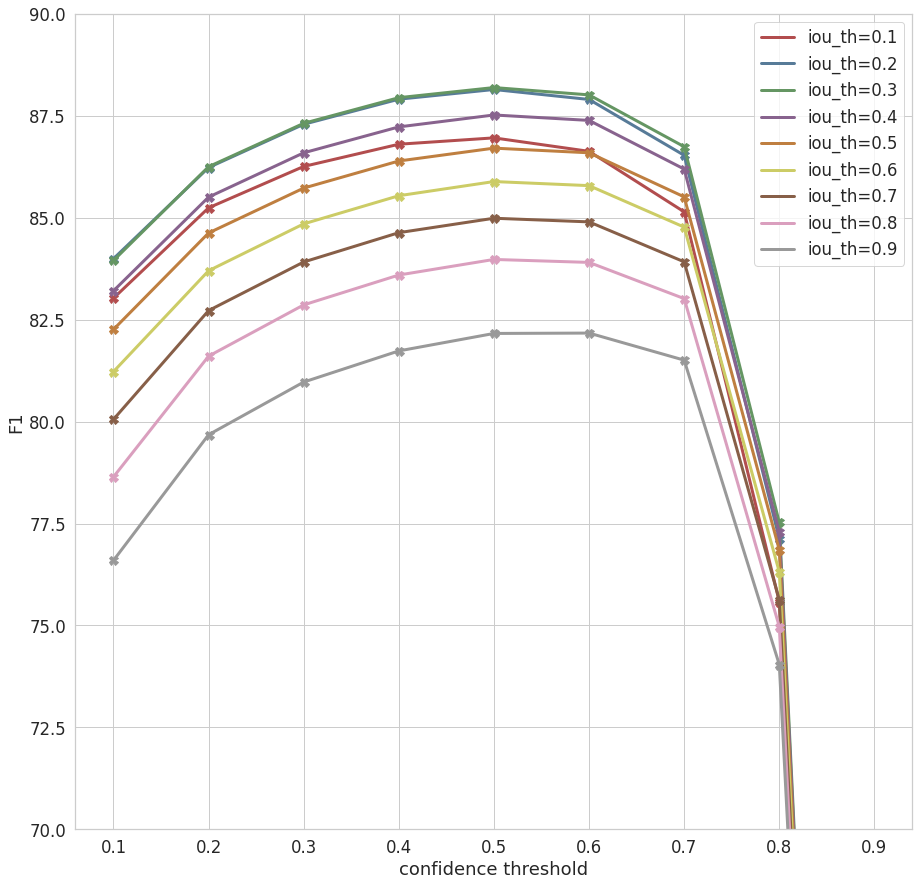

In [232]:
ious = nms.iou_th.unique()
confs = nms.conf_th.unique()
markers = ['o', 'v', '^', '*', '4', 'P', 'p', 'X', 'H']

plt.tight_layout()
plt.figure(figsize=(15,15))
ax  = plt.gca()

sns.set(style = 'whitegrid', font_scale = 1.5)
palette = sns.color_palette("Set1", n_colors=9, desat=0.5)

for i, iou in enumerate(ious):
    nms_ = nms[nms.iou_th==iou]
    obs_ = obs[obs.iou_th==iou]
    
    nms_xs = nms_.conf_th.values
    nms_ys = nms_.F1.values
    
    obs_xs = obs_.conf_th.values
    obs_ys = obs_.F1.values
    
    
    ma_nms = plt.plot(nms_xs, nms_ys, color=palette[i], marker='X',  linestyle='', markersize=9) #, label='NMS' if i==0 else '')
    # ma_obs = plt.plot(obs_xs, obs_ys, color=palette[i], marker='o',  linestyle='', markersize=9, label='OBS' if i==0 else '')
    
    li_nms = plt.plot(nms_xs, nms_ys, color=palette[i], marker='', linewidth=3, label=f'iou_th={iou}')
    # li_obs = plt.plot(obs_xs, obs_ys, color=palette[i], marker='', linewidth=3)
    
    
plt.xlabel('confidence threshold')
plt.ylabel('F1')
handles, labels = ax.get_legend_handles_labels()
plt.ylim([70, 90])
_ = plt.legend()

### metrics, conf_th=0.1 (bo najbardziej tożsame z coco metrics - tam jest 0.01)

best na podstawie F1:
- best nms iou_th=0.2
- best obs iou_th=0.1 (potem zmiana przy ostatecznych - best pod AP a nie simple)

In [268]:
obs[(obs.conf_th==0.1)]

,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,OBS,0.1,0.1,50.555447,83.907805,42034,7847,5644,84.268559,88.162255,86.171445
9,OBS,0.1,0.2,50.547406,83.904912,42064,7986,5614,84.043956,88.225177,86.083824
18,OBS,0.1,0.3,50.564818,83.902602,42052,8153,5626,83.760582,88.200008,85.922990
27,OBS,0.1,0.4,50.607009,84.115405,42057,8370,5621,83.401749,88.210495,85.738749
36,OBS,0.1,0.5,50.619622,84.106544,42073,8708,5605,82.851854,88.244054,85.462985
45,OBS,0.1,0.6,50.614239,84.066187,42101,9173,5577,82.109841,88.302781,85.093783
54,OBS,0.1,0.7,50.575607,83.931853,42143,9890,5535,80.992831,88.390872,84.530293
63,OBS,0.1,0.8,50.356291,83.531986,42160,10882,5518,79.484182,88.426528,83.717236
72,OBS,0.1,0.9,49.791419,82.524503,42164,12406,5514,77.265897,88.434918,82.473985


In [258]:
_nms = nms[(nms.conf_th==0.1) & (nms.iou_th==0.2)]
_obs = obs[(obs.conf_th==0.1) & (obs.iou_th==0.1)]
_baseline = baseline[baseline.conf_th==0.1]


metrics = pd.concat([_baseline, _nms, _obs], ignore_index=True)
metrics

,method,conf_th,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NONE,0.1,NONE,44.623804,72.842434,42387,25318,5291,62.605421,88.902639,73.471829
1,NMS,0.1,0.2,46.061499,82.233822,41402,9501,6276,81.335088,86.836696,83.995902
2,OBS,0.1,0.1,50.555447,83.907805,42034,7847,5644,84.268559,88.162255,86.171445


### table

In [266]:
out_table = '../../tables/SDS-OBS-iou-th-best.tex'

header = metrics.columns.tolist()

rows = []
for i in range(len(metrics)):
    row = metrics.iloc[i].values.tolist()
    formatted_row = []
    for j,x in enumerate(row):
        if isinstance(x, str) or isinstance(x, np.int64):
            formatted_row.append(x)
            continue
        elif isinstance(x, float):
            formatted_row.append(f'{x:.1f}')
        else:
            print(type(x))

    rows.append(formatted_row)

open(out_table, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))
print(tabulate(rows, header))

method      conf_th  iou_th      AP    AP50     TP     FP    FN     P     R    F1
--------  ---------  --------  ----  ------  -----  -----  ----  ----  ----  ----
NONE            0.1  NONE      44.6    72.8  42387  25318  5291  62.6  88.9  73.5
NMS             0.1  0.2       46.1    82.2  41402   9501  6276  81.3  86.8  84
OBS             0.1  0.1       50.6    83.9  42034   7847  5644  84.3  88.2  86.2


/tmp/ipykernel_63263/3998187352.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../tables/SDS-OBS-iou-th-best.tex' mode='w' encoding='UTF-8'>
  open(out_table, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))


## best diff FP 

In [350]:
def get_biggest_diff(pred_nms, pred_obs, gt, conf, iou_th):
    gt = json.load(open(gt))
    pred_obs = json.load(open(pred_obs))
    pred_nms = json.load(open(pred_nms))
    unique_ids = sorted(list(set([x['id'] for x in gt['images']])))
    id2img_path = {}
    for i, id in enumerate(unique_ids):
        id2img_path[i]=[x['file_name'] for x in gt['images'] if x['id']==id][0]


    gt_objects = []
    for img_id in unique_ids:
        img_annos = [x for x in gt['annotations'] if x['image_id']==img_id]

        img_bboxes = []

        for img_anno in img_annos:
            xmin,ymin,w,h = img_anno['bbox']
            xmax,ymax = xmin+w, ymin+h
            cls = img_anno['category_id']
            img_bboxes.append([xmin,ymin,xmax,ymax,cls])
        gt_objects.append(img_bboxes)

    nc = len(gt['categories'])


    pred_objects_obs = []
    for img_id in unique_ids:
        img_annos = [x for x in pred_obs if x['image_id']==img_id]

        img_bboxes = []

        for img_anno in img_annos:
            xmin,ymin,w,h = img_anno['bbox']
            xmax,ymax = xmin+w, ymin+h
            cls = img_anno['category_id']
            score = img_anno['score']
            img_bboxes.append([xmin,ymin,xmax,ymax,score,cls])
        pred_objects_obs.append(img_bboxes)

    pred_objects_nms = []
    for img_id in unique_ids:
        img_annos = [x for x in pred_nms if x['image_id']==img_id]

        img_bboxes = []

        for img_anno in img_annos:
            xmin,ymin,w,h = img_anno['bbox']
            xmax,ymax = xmin+w, ymin+h
            cls = img_anno['category_id']
            score = img_anno['score']
            img_bboxes.append([xmin,ymin,xmax,ymax,score,cls])
        pred_objects_nms.append(img_bboxes)    
    
    assert len(pred_objects_obs)==len(pred_objects_nms)==len(gt_objects)
    
    
    fps_per_img_nms = []
    for i in range(len(gt_objects)):

        img_gt = torch.tensor(gt_objects[i])
        img_pred = torch.tensor(pred_objects_nms[i])

        if img_gt.numel():
            gt_bboxes = img_gt[:, :-1]
            gt_cls = img_gt[:,-1]
        else:
            gt_bboxes = torch.empty((0,4))
            gt_cls = torch.empty((0))

        CM = metrics.ConfusionMatrix(nc, conf=conf, iou_thres=iou_th)
        CM.process_batch(img_pred, gt_bboxes, gt_cls)
        tp, fp, fn = CM.tp_fp_fn()    
        tp, fp, fn = tp.sum(), fp.sum(), fn.sum()
        fps_per_img_nms.append(fp)
        
    fps_per_img_obs = []
    for i in range(len(gt_objects)):

        img_gt = torch.tensor(gt_objects[i])
        img_pred = torch.tensor(pred_objects_obs[i])

        if img_gt.numel():
            gt_bboxes = img_gt[:, :-1]
            gt_cls = img_gt[:,-1]
        else:
            gt_bboxes = torch.empty((0,4))
            gt_cls = torch.empty((0))

        CM = metrics.ConfusionMatrix(nc, conf=conf, iou_thres=iou_th)
        CM.process_batch(img_pred, gt_bboxes, gt_cls)
        tp, fp, fn = CM.tp_fp_fn()    
        tp, fp, fn = tp.sum(), fp.sum(), fn.sum()
        fps_per_img_obs.append(fp)
        
        
    biggest_diff = 0
    biggest_diff_id = None

    for i, (fp_nms, fp_obs) in enumerate(zip(fps_per_img_nms, fps_per_img_obs)):
        diff = fp_nms - fp_obs
        # print(diff)
        if diff < 0:
            # print('FP obs > FP nms')
            continue

        if diff > biggest_diff:
            biggest_diff = diff
            biggest_diff_id = i

    print(biggest_diff_id, id2img_path[biggest_diff_id], biggest_diff)

In [351]:
import ultralytics.utils.metrics as metrics
import torch
import json
import warnings
warnings.filterwarnings(action='ignore')

sds_res_obs = 'ablation/OBS-iou/SDS-OBS-th01/results-test_dev.json'
sds_res_nms = 'ablation/OBS-iou/SDS-NMS-th02/results-test_dev.json'
sds_gt = 'data/SeaDronesSee/test_dev.json'

zebra_res_obs = 'ablation/OBS-iou/Zebra-OBS-th01/results-val.json'
zebra_res_nms = 'ablation/OBS-iou/Zebra-NMS-th03/results-val.json'
zebra_gt = 'data/3DZeF20/val.json'

dc_res_obs = 'ablation/OBS-iou/DC-OBS-th05/results-test_minus_val.json'
dc_res_nms = 'ablation/OBS-iou/DC-NMS-th05/results-test_minus_val.json'
dc_gt = 'data/DroneCrowd/test_minus_val.json'

In [370]:
# get_biggest_diff(zebra_res_nms, zebra_res_obs, zebra_gt, conf=0.1, iou_th=0.5)
# get_biggest_diff(sds_res_nms, sds_res_obs, sds_gt, conf=0.1, iou_th=0.5)
get_biggest_diff(dc_res_nms, dc_res_obs, dc_gt, conf=0.1, iou_th=0.5)

8225 img111174.jpg 93.0


### SDS - vis

In [357]:
def plot_one_box(bbox, img, color, label=None, lw=2, draw_label=True):
    
    xmin,ymin,xmax,ymax = list(map(int, bbox))
    img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), color, lw)

    if draw_label:
        ((text_width, text_height), _) = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.45, 1)
        img = cv2.rectangle(img, (xmin, ymin - int(1.3 * text_height)), (xmin + text_width, ymin), color, -1)
        
        img = cv2.putText(
            img,
            text=label,
            org=(xmin, ymin - int(0.3 * text_height)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.45,
            color=(0, 0, 0),
            lineType=cv2.LINE_AA,
    )
    return img

In [368]:
img_path = 'data/SeaDronesSee/images/val/31139.jpg'


nms_win =  [[2354,  462, 2866,  974],
 [2044,  561, 2556, 1073],
 [1906 , 300, 2418,  812],
 [1654 , 303 ,2166 , 815],
 [2854 , 105 ,3366 , 617],
 [1964 ,   0, 2476 , 512],
 [1246 ,   0, 1758 , 512]]
nms_dets = [[1.4379e+03, 6.8090e+01, 1.5584e+03, 2.3760e+02, 9.1548e-01, 2.0000e+00],
        [2.9912e+03, 2.9333e+02, 3.2183e+03, 4.2939e+02, 9.0321e-01, 2.0000e+00],
        [2.7887e+03, 6.1691e+02, 2.8533e+03, 6.5850e+02, 7.8378e-01, 0.0000e+00],
        [2.1231e+03, 5.2193e+02, 2.1844e+03, 5.8442e+02, 7.7553e-01, 0.0000e+00],
        [2.1909e+03, 1.4827e+02, 2.2518e+03, 1.8866e+02, 7.7118e-01, 1.0000e+00],
        [2.4104e+03, 6.4063e+02, 2.4828e+03, 6.9921e+02, 7.5546e-01, 0.0000e+00],
        [2.2631e+03, 7.8499e+02, 2.3294e+03, 8.3096e+02, 7.4553e-01, 1.0000e+00],
        [1.8924e+03, 5.2368e+02, 1.9664e+03, 5.8903e+02, 7.3163e-01, 0.0000e+00],
        [1.8924e+03, 5.2368e+02, 1.9664e+03, 5.8903e+02, 7.0775e-01, 1.0000e+00],
        [2.5717e+03, 7.0202e+02, 2.6438e+03, 7.4496e+02, 6.2089e-01, 0.0000e+00],
        [2.4104e+03, 6.4063e+02, 2.4828e+03, 6.9921e+02, 5.5092e-01, 1.0000e+00],
        [2.1231e+03, 5.2193e+02, 2.1844e+03, 5.8442e+02, 2.9526e-01, 1.0000e+00],
        [2.4066e+03, 6.3560e+02, 2.4182e+03, 6.7907e+02, 2.1013e-01, 1.0000e+00],
        [2.5717e+03, 7.0202e+02, 2.6438e+03, 7.4496e+02, 1.6059e-01, 1.0000e+00],
        [2.4066e+03, 6.3560e+02, 2.4182e+03, 6.7907e+02, 3.8439e-02, 0.0000e+00],
        [3.3228e+03, 3.9749e+02, 3.3519e+03, 4.1843e+02, 1.6386e-02, 0.0000e+00],
        [3.0161e+03, 4.4392e+02, 3.0334e+03, 4.6334e+02, 1.3456e-02, 0.0000e+00]]


obs_win = nms_win

obs_dets = [[2.7887e+03, 6.1691e+02, 2.8533e+03, 6.5850e+02, 7.8378e-01, 0.0000e+00],
        [2.5722e+03, 7.0208e+02, 2.6438e+03, 7.4489e+02, 6.2089e-01, 0.0000e+00],
        [2.5700e+03, 7.0179e+02, 2.6438e+03, 7.4523e+02, 1.6059e-01, 1.0000e+00],
        [2.4043e+03, 6.3717e+02, 2.4827e+03, 7.0063e+02, 7.5546e-01, 0.0000e+00],
        [2.2635e+03, 7.8440e+02, 2.3306e+03, 8.4502e+02, 7.4553e-01, 1.0000e+00],
        [2.1234e+03, 5.2221e+02, 2.2004e+03, 5.8404e+02, 7.7553e-01, 0.0000e+00],
        [1.8839e+03, 5.1959e+02, 1.9665e+03, 5.8936e+02, 7.0775e-01, 1.0000e+00],
        [2.9912e+03, 2.9333e+02, 3.2183e+03, 4.2939e+02, 9.0321e-01, 2.0000e+00],
        [3.3228e+03, 3.9749e+02, 3.3519e+03, 4.1843e+02, 1.6386e-02, 0.0000e+00],
        [3.0161e+03, 4.4392e+02, 3.0334e+03, 4.6334e+02, 1.3456e-02, 0.0000e+00],
        [2.1909e+03, 1.4827e+02, 2.2518e+03, 1.8866e+02, 7.7118e-01, 1.0000e+00],
        [1.4379e+03, 6.8090e+01, 1.5584e+03, 2.3760e+02, 9.1548e-01, 2.0000e+00]],

# nms_win = [[2339,  455, 2851,  967],
#  [2031,  520, 2543, 1032],                                                                                                                            
#  [1909,  305, 2421,  817],                                                                                                                            
#  [1708,  259, 2220,  771],                                                                                                                            
#  [2854,  163, 3366,  675],                                                                                                                            
#  [2034,    0, 2546,  512],                                                                                                                            
#  [1341,    0, 1853,  512]]
# nms_dets = [[1.5316e+03, 7.2745e+01, 1.6505e+03, 2.2315e+02, 9.1278e-01, 2.0000e+00],                                                                 
#         [2.9978e+03, 3.5560e+02, 3.2151e+03, 4.8566e+02, 9.1055e-01, 2.0000e+00],                                                                 
#         [1.9327e+03, 4.8521e+02, 2.0027e+03, 5.4239e+02, 8.1602e-01, 0.0000e+00],                                                                 
#         [2.2518e+03, 1.7246e+02, 2.3070e+03, 2.1928e+02, 7.9107e-01, 1.0000e+00],                                                                 
#         [2.1336e+03, 5.0242e+02, 2.2187e+03, 5.6120e+02, 7.3500e-01, 0.0000e+00],                                                                 
#         [2.1281e+03, 5.1978e+02, 2.2260e+03, 5.6031e+02, 7.3282e-01, 0.0000e+00],                                                                 
#         [2.2352e+03, 7.3928e+02, 2.3207e+03, 8.0487e+02, 7.1521e-01, 1.0000e+00],                                                                 
#         [2.7755e+03, 6.2796e+02, 2.8261e+03, 6.6749e+02, 6.4002e-01, 0.0000e+00],                                                                 
#         [2.5639e+03, 6.8728e+02, 2.6234e+03, 7.3132e+02, 5.9365e-01, 0.0000e+00],                                                                 
#         [2.3996e+03, 6.1786e+02, 2.4728e+03, 6.8019e+02, 5.7950e-01, 0.0000e+00],                                                                 
#         [2.3996e+03, 6.1786e+02, 2.4728e+03, 6.8019e+02, 4.7934e-01, 1.0000e+00],                                                                 
#         [2.4256e+03, 6.3730e+02, 2.4714e+03, 6.7888e+02, 4.7509e-01, 0.0000e+00],                                                                 
#         [2.3995e+03, 6.1443e+02, 2.4212e+03, 6.8082e+02, 2.5725e-01, 0.0000e+00],                                                                 
#         [2.1674e+03, 5.0448e+02, 2.2137e+03, 5.5696e+02, 2.2533e-01, 0.0000e+00],                                                                 
#         [1.9327e+03, 4.8521e+02, 2.0027e+03, 5.4239e+02, 1.8329e-01, 1.0000e+00],                                                                 
#         [2.5639e+03, 6.8728e+02, 2.6234e+03, 7.3132e+02, 1.4527e-01, 1.0000e+00],
#         [2.3995e+03, 6.1443e+02, 2.4212e+03, 6.8082e+02, 1.0834e-01, 1.0000e+00],
#         [2.4256e+03, 6.3730e+02, 2.4714e+03, 6.7888e+02, 1.0479e-01, 1.0000e+00],
#         [2.1336e+03, 5.0242e+02, 2.2187e+03, 5.6120e+02, 9.5531e-02, 1.0000e+00],
#         [2.3992e+03, 5.8431e+02, 2.4206e+03, 6.5492e+02, 1.7868e-02, 1.0000e+00],
#         [2.3992e+03, 5.8431e+02, 2.4206e+03, 6.5492e+02, 1.4156e-02, 0.0000e+00]]


# obs_win = [[2339,  455, 2851,  967],                                                                             
#  [2031,  520, 2543, 1032],
#  [1909,  305, 2421,  817],
#  [1708,  259, 2220,  771],
#  [2854,  163, 3366,  675],
#  [2034,    0, 2546,  512],
#  [1341,    0, 1853,  512]]
# obs_dets = [[2.7755e+03, 6.2796e+02, 2.8261e+03, 6.6749e+02, 6.4002e-01, 0.0000e+00],
#         [2.5638e+03, 6.8744e+02, 2.6232e+03, 7.3121e+02, 5.9365e-01, 0.0000e+00],
#         [2.3955e+03, 6.1589e+02, 2.4721e+03, 6.7956e+02, 4.7934e-01, 1.0000e+00],
#         [2.5643e+03, 6.8662e+02, 2.6243e+03, 7.3176e+02, 1.4527e-01, 1.0000e+00],
#         [1.9325e+03, 4.8544e+02, 2.0035e+03, 5.4181e+02, 8.1602e-01, 0.0000e+00],
#         [2.1368e+03, 5.0267e+02, 2.2202e+03, 5.6224e+02, 7.3500e-01, 0.0000e+00],
#         [2.2353e+03, 7.3913e+02, 2.3211e+03, 8.0590e+02, 6.9899e-01, 1.0000e+00],
#         [2.9978e+03, 3.5560e+02, 3.2151e+03, 4.8566e+02, 9.1055e-01, 2.0000e+00],
#         [2.2518e+03, 1.7246e+02, 2.3070e+03, 2.1928e+02, 7.9107e-01, 1.0000e+00],
#         [1.5316e+03, 7.2745e+01, 1.6505e+03, 2.2315e+02, 9.1278e-01, 2.0000e+00]]

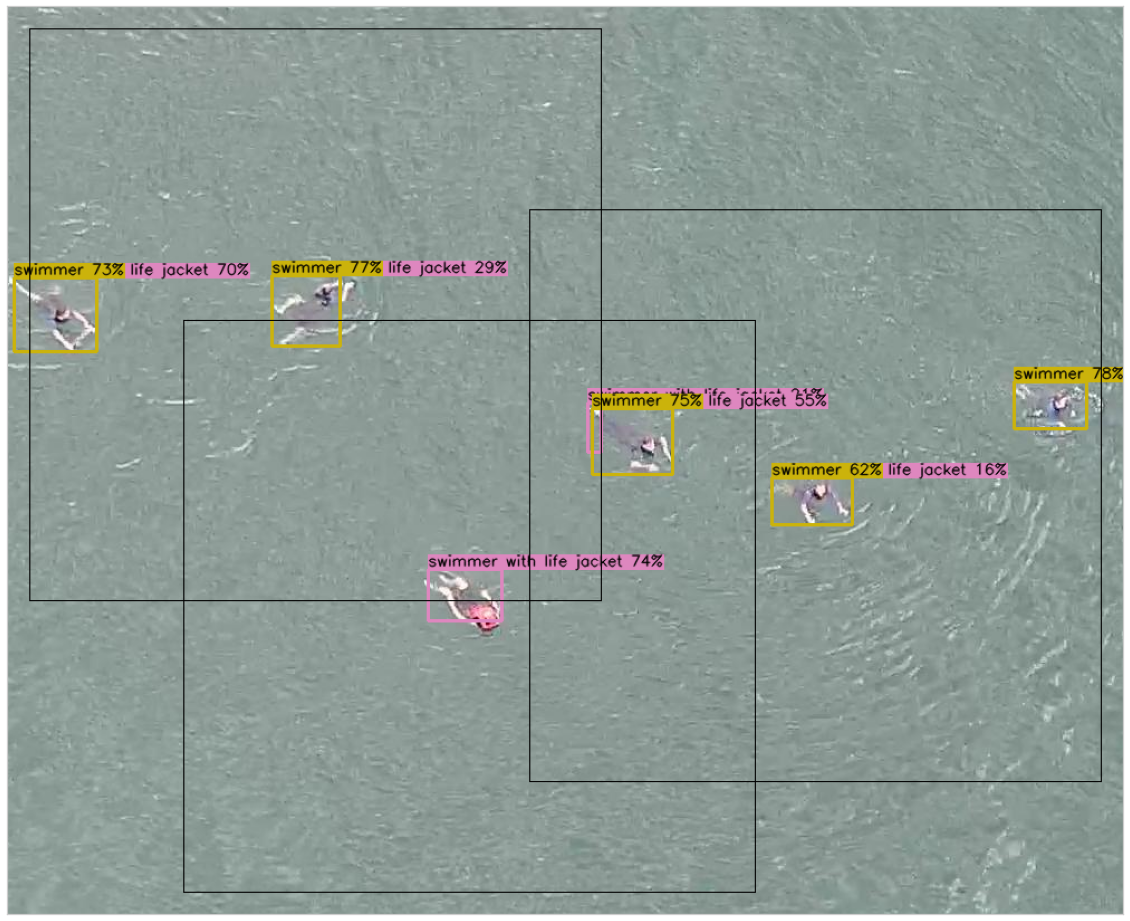

In [369]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


classes = ['swimmer', 'swimmer with life jacket', 'boat', 'life jacket']
colors = [(203, 179, 11), (222, 135, 191), (40, 195, 132), (75, 140, 112)]
show_label = True

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_nms = img.copy()
img_obs = img.copy()

nms_dets = np.array(nms_dets)
nms_dets = nms_dets[nms_dets[:, -2] >= 0.1]
nms_dets = nms_dets[nms_dets[:, -2].argsort()]
for det in nms_dets.tolist():
    xmin,ymin,xmax,ymax,conf,cls = det
    if int(conf*100) == 18:
        print('del')
        continue
    img_nms = plot_one_box(
        list(map(int, [xmin,ymin,xmax,ymax])), 
        img_nms, 
        color=colors[int(cls)], 
        label=f'{classes[int(cls)]} {int(conf*100)}%' if show_label else ''
    ) 
nms_win = [x for i,x in enumerate(nms_win) if i==0 or i==1 or i==2] # or i==3]


for i,det in enumerate(nms_win):
    xmin,ymin,xmax,ymax = map(int, det)
    img_nms = cv2.rectangle(img_nms, (xmin, ymin), (xmax,ymax), (0,0,0), 1)

xmin = min([x[0]-20 for x in nms_win])
ymin = min([x[1]-20 for x in nms_win])
xmax = max([x[2]+20 for x in nms_win])
ymax = max([x[3]+20 for x in nms_win])
img_nms = img_nms[ymin:ymax, xmin:xmax,:]

    
plt.figure(figsize=(20,20))
plt.xticks([]);plt.yticks([])
plt.imshow(img_nms)
plt.savefig('../../plots/nms-vs-obs/SDS-NMS-new.png', bbox_inches='tight', pad_inches=0)

In [371]:
obs_dets = np.array(obs_dets)
obs_dets = obs_dets[obs_dets[:, -2] >= 0.1]
obs_dets = obs_dets[obs_dets[:, -2].argsort()]
for det in obs_dets.tolist():
    xmin,ymin,xmax,ymax,conf,cls = det
    img_obs = plot_one_box(
        list(map(int, [xmin,ymin,xmax,ymax])), 
        img_obs, 
        color=colors[int(cls)], 
        label=f'{classes[int(cls)]} {int(conf*100)}%' if show_label else ''
    ) 
obs_win = [x for i,x in enumerate(obs_win) if i==0 or i==1 or i==2]# or i==3]


for i,det in enumerate(obs_win):
    # if i!=0 and i!=1 and i!=2:
    #     continue
    xmin,ymin,xmax,ymax = map(int, det)
    img_obs = cv2.rectangle(img_obs, (xmin, ymin), (xmax,ymax), (0,0,0), 1)

xmin = min([x[0]-20 for x in obs_win])
ymin = min([x[1]-20 for x in obs_win])
xmax = max([x[2]+20 for x in obs_win])
ymax = max([x[3]+20 for x in obs_win])
img_obs = img_obs[ymin:ymax, xmin:xmax,:]

    
plt.figure(figsize=(20,20))
plt.xticks([]);plt.yticks([])
plt.imshow(img_obs)
plt.savefig('../../plots/nms-vs-obs/SDS-OBS-new.png', bbox_inches='tight', pad_inches=0)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 12 but corresponding boolean dimension is 6

### Zebra vis

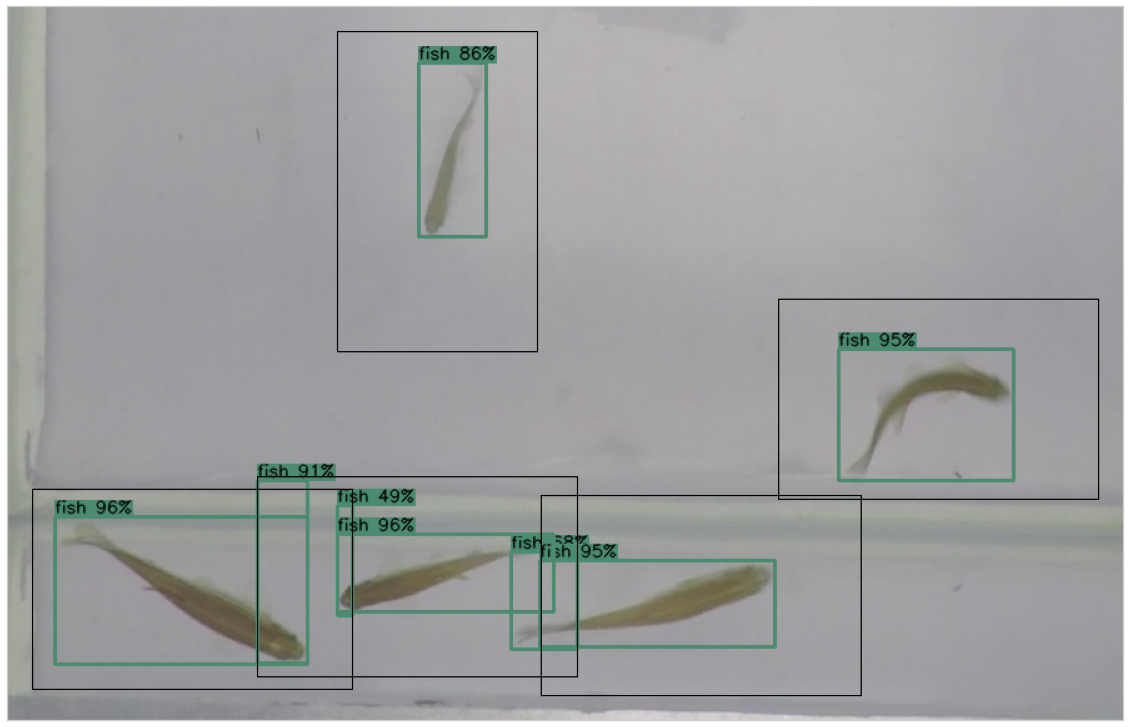

In [358]:
# img_path = 'data/3DZeF20/train/ZebraFish-03/imgT/000686.jpg'
img_path = 'data/3DZeF20/train/ZebraFish-04/imgT/000789.jpg'

classes = ['fish']
colors = [(75, 140, 112)]
show_label = True

# wins = [
#     [1514, 1193, 1770, 1353],
#     [1435, 1111, 1595, 1367]
# ]

# nms_dets = [[1.4995e+03, 1.1657e+03, 1.5769e+03, 1.2846e+03, 9.4336e-01, 0.0000e+00],
#         [1.5331e+03, 1.2492e+03, 1.6901e+03, 1.2833e+03, 9.1863e-01, 0.0000e+00],
#         [1.4974e+03, 1.2968e+03, 1.5463e+03, 1.3661e+03, 8.4597e-01, 0.0000e+00],
#         [1.5140e+03, 1.1950e+03, 1.5568e+03, 1.3527e+03, 7.4120e-01, 0.0000e+00],
#         [1.5139e+03, 1.1928e+03, 1.5647e+03, 1.2932e+03, 5.7003e-01, 0.0000e+00],
#         [1.5330e+03, 1.3095e+03, 1.5948e+03, 1.3419e+03, 5.0821e-01, 0.0000e+00],
#         [1.5317e+03, 1.2480e+03, 1.5953e+03, 1.2839e+03, 4.7999e-01, 0.0000e+00],
#         [1.5337e+03, 1.3122e+03, 1.5949e+03, 1.3592e+03, 2.2997e-01, 0.0000e+00],
#         [1.5311e+03, 1.2509e+03, 1.5949e+03, 1.3210e+03, 3.6527e-02, 0.0000e+00],
#         [1.5344e+03, 1.3096e+03, 1.6903e+03, 1.3364e+03, 1.4462e-02, 0.0000e+00]
#            ]

# obs_dets = [[1.5331e+03, 1.2492e+03, 1.6901e+03, 1.2833e+03, 9.1863e-01, 0.0000e+00],
#         [1.5344e+03, 1.3096e+03, 1.6903e+03, 1.3364e+03, 1.4462e-02, 0.0000e+00],
#         [1.4995e+03, 1.1657e+03, 1.5769e+03, 1.2846e+03, 9.4336e-01, 0.0000e+00],
#         [1.4977e+03, 1.2967e+03, 1.5452e+03, 1.3662e+03, 8.4597e-01, 0.0000e+00]]

wins = [[1234, 1283, 1490, 1443],
 [ 827, 1278, 1083, 1438],
 [1007, 1268, 1263, 1428],
 [1424, 1126, 1680, 1286],
 [1071, 912, 1231, 1168]]
nms_dets = [[8.4533e+02, 1.3004e+03, 1.0478e+03, 1.4182e+03, 9.6791e-01, 0.0000e+00],
        [1.0710e+03, 1.3141e+03, 1.2447e+03, 1.3768e+03, 9.6191e-01, 0.0000e+00],
        [1.4727e+03, 1.1668e+03, 1.6122e+03, 1.2715e+03, 9.5812e-01, 0.0000e+00],
        [1.2336e+03, 1.3359e+03, 1.4217e+03, 1.4041e+03, 9.5148e-01, 0.0000e+00],
        [1.0070e+03, 1.2718e+03, 1.0471e+03, 1.4173e+03, 9.1737e-01, 0.0000e+00],
        [1.1367e+03, 9.3735e+02, 1.1904e+03, 1.0766e+03, 8.6191e-01, 0.0000e+00],
        [1.2100e+03, 1.3284e+03, 1.2630e+03, 1.4062e+03, 6.8019e-01, 0.0000e+00],
        [1.0711e+03, 1.2911e+03, 1.0830e+03, 1.3790e+03, 4.9626e-01, 0.0000e+00],
        [1.2340e+03, 1.2842e+03, 1.2486e+03, 1.3397e+03, 1.3572e-01, 0.0000e+00],
        [1.2339e+03, 1.3054e+03, 1.2486e+03, 1.3995e+03, 1.2694e-01, 0.0000e+00],
        [1.5631e+03, 1.2625e+03, 1.5721e+03, 1.2707e+03, 6.7853e-02, 0.0000e+00],
        [1.0641e+03, 1.3509e+03, 1.0830e+03, 1.4382e+03, 3.7957e-02, 0.0000e+00]]

obs_dets = [[1.2336e+03, 1.3359e+03, 1.4217e+03, 1.4041e+03, 9.5148e-01, 0.0000e+00],
        [8.4533e+02, 1.3004e+03, 1.0478e+03, 1.4182e+03, 9.6791e-01, 0.0000e+00],
        [1.0710e+03, 1.3141e+03, 1.2447e+03, 1.3768e+03, 9.6191e-01, 0.0000e+00],
        [1.4727e+03, 1.1668e+03, 1.6122e+03, 1.2715e+03, 9.5812e-01, 0.0000e+00],
        [1.5631e+03, 1.2625e+03, 1.5721e+03, 1.2707e+03, 6.7853e-02, 0.0000e+00],
        [1.1367e+03, 9.3735e+02, 1.1904e+03, 1.0766e+03, 8.6191e-01, 0.0000e+00]]


img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_nms = img.copy()
img_obs = img.copy()

nms_dets = np.array(nms_dets)
nms_dets = nms_dets[nms_dets[:, -2] >= 0.2]
nms_dets = nms_dets[nms_dets[:, -2].argsort()]
for det in nms_dets.tolist():
    xmin,ymin,xmax,ymax,conf,cls = det
    img_nms = plot_one_box(
        list(map(int, [xmin,ymin,xmax,ymax])), 
        img_nms, 
        color=colors[int(cls)], 
        label=f'{classes[int(cls)]} {int(conf*100)}%' if show_label else ''
    ) 

for i,det in enumerate(wins):
    xmin,ymin,xmax,ymax = map(int, det)
    img_nms = cv2.rectangle(img_nms, (xmin, ymin), (xmax,ymax), (0,0,0), 1)

xmin = min([x[0]-20 for x in wins])
ymin = min([x[1]-20 for x in wins])
xmax = max([x[2]+20 for x in wins])
ymax = max([x[3]+20 for x in wins])
img_nms = img_nms[ymin:ymax, xmin:xmax,:]

    
plt.figure(figsize=(20,20))
plt.xticks([]);plt.yticks([])
plt.imshow(img_nms)
plt.savefig('../../plots/nms-vs-obs/Zebra-NMS-new.png', bbox_inches='tight', pad_inches=0)

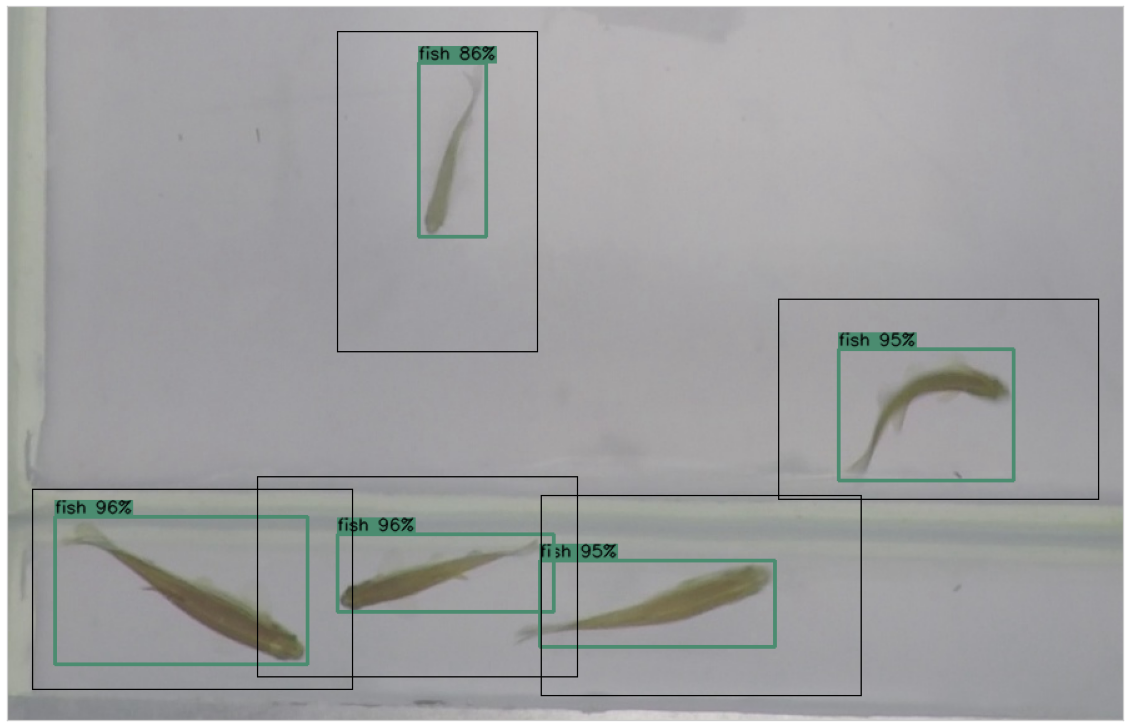

In [359]:
obs_dets = np.array(obs_dets)
obs_dets = obs_dets[obs_dets[:, -2] >= 0.1]
obs_dets = obs_dets[obs_dets[:, -2].argsort()]
for det in obs_dets.tolist():
    xmin,ymin,xmax,ymax,conf,cls = det
    img_obs = plot_one_box(
        list(map(int, [xmin,ymin,xmax,ymax])), 
        img_obs, 
        color=colors[int(cls)], 
        label=f'{classes[int(cls)]} {int(conf*100)}%' if show_label else ''
    ) 


for i,det in enumerate(wins):
    xmin,ymin,xmax,ymax = map(int, det)
    img_obs = cv2.rectangle(img_obs, (xmin, ymin), (xmax,ymax), (0,0,0), 1)

xmin = min([x[0]-20 for x in wins])
ymin = min([x[1]-20 for x in wins])
xmax = max([x[2]+20 for x in wins])
ymax = max([x[3]+20 for x in wins])
img_obs = img_obs[ymin:ymax, xmin:xmax,:]

    
plt.figure(figsize=(20,20))
plt.xticks([]);plt.yticks([])
plt.imshow(img_obs)
plt.savefig('../../plots/nms-vs-obs/Zebra-OBS-new.png', bbox_inches='tight', pad_inches=0)

### concat vis

In [367]:
sds_nms, sds_obs = cv2.imread('/home/kos/projects/PhD/EAAI/plots/nms-vs-obs/SDS-NMS.png'), cv2.imread('/home/kos/projects/PhD/EAAI/plots/nms-vs-obs/SDS-OBS.png')
zebra_nms, zebra_obs = cv2.imread('/home/kos/projects/PhD/EAAI/plots/nms-vs-obs/Zebra-NMS-new.png'), cv2.imread('/home/kos/projects/PhD/EAAI/plots/nms-vs-obs/Zebra-OBS-new.png')

h,w,c = sds_nms.shape
ruller = np.full((h,10,3), 255)
sds = np.hstack((np.hstack((sds_nms, ruller)), sds_obs))

h,w,c = zebra_nms.shape
ruller = np.full((h,10,3), 255)
zebra = np.hstack((np.hstack((zebra_nms, ruller)), zebra_obs))

h,w,c = zebra.shape
zebra = cv2.resize(zebra.astype(np.uint8), (2248, h))
h,w,c = zebra.shape
ruller = np.full((10,w,3), 255)

print(sds.shape, ruller.shape, zebra.shape)
all = np.vstack((np.vstack((sds, ruller)), zebra))

cv2.imwrite('/home/kos/projects/PhD/EAAI/plots/nms-vs-obs/OBS-vs-NMS.png', all)

(875, 2248, 3) (10, 2248, 3) (713, 2248, 3)


True

# OBS vs NMS

In [16]:
sds_csv = 'ablation/SDS-OBS-iouths.csv'
metrics_obs_sds = pd.read_csv(sds_csv)

metrics_obs_sds['method'] = metrics_obs_sds.apply(lambda x: x.dataset.split('-')[1], axis=1)
metrics_obs_sds['dataset'] = metrics_obs_sds.apply(lambda x: x.dataset.split('-')[-1], axis=1)
metrics_obs_sds = metrics_obs_sds.rename(columns={'dataset': 'iou_th'})
metrics_obs_sds = metrics_obs_sds.sort_values(by='F1', ascending=False)
metrics_obs_sds.iou_th = metrics_obs_sds.apply(lambda x: x.iou_th.replace('th0', '0.'), axis=1)

metrics_obs_sds

,method,iou_th,AP,AP50,AP75,APu,APvt,APt,APs,APm,...,ARt,ARs,ARm,ARl,TP,FP,FN,P,R,F1
10,OBS,0.1,50.555447,83.907805,53.745302,-100,35.872839,46.415571,58.636906,38.944832,...,57.716395,66.789160,44.628259,67.163645,42034,7847,5644,84.268559,88.162255,86.171445
11,OBS,0.2,50.547406,83.904912,53.735688,-100,35.871889,46.484585,58.661004,38.928176,...,57.837368,66.850761,44.577387,67.239981,42064,7986,5614,84.043956,88.225177,86.083824
12,OBS,0.3,50.564818,83.902602,53.733861,-100,35.870441,46.507383,58.648369,38.964364,...,57.872947,66.852187,44.730003,67.239981,42052,8153,5626,83.760582,88.200008,85.922990
13,OBS,0.4,50.607009,84.115405,53.731959,-100,35.854408,46.521576,58.704558,39.026573,...,57.897261,66.926337,44.783298,67.316317,42057,8370,5621,83.401749,88.210495,85.738749
14,OBS,0.5,50.619622,84.106544,53.891835,-100,35.787051,46.616244,58.721824,39.006489,...,58.113920,66.937745,44.783298,67.316317,42073,8708,5605,82.851854,88.244054,85.462985
15,OBS,0.6,50.614239,84.066187,53.865370,-100,35.664668,46.589169,58.717178,38.980494,...,58.191529,66.947992,44.783298,67.316317,42101,9173,5577,82.109841,88.302781,85.093783
16,OBS,0.7,50.575607,83.931853,53.789903,-100,35.656649,46.424561,58.701890,38.956222,...,58.240997,66.965104,44.795955,67.316317,42143,9890,5535,80.992831,88.390872,84.530293
1,NMS,0.2,46.061499,82.233822,45.406203,-100,34.962112,42.261604,52.120003,34.532247,...,55.445705,61.928124,40.156110,65.999523,41402,9501,6276,81.335088,86.836696,83.995902
2,NMS,0.3,47.852204,83.531324,48.081494,-100,34.959422,43.455737,54.780521,35.830765,...,56.135744,63.856137,41.121605,67.049141,41840,10158,5838,80.464633,87.755359,83.952004
17,OBS,0.8,50.356291,83.531986,53.549119,-100,35.497605,45.905054,58.577029,38.908577,...,58.291770,66.968526,44.795955,67.316317,42160,10882,5518,79.484182,88.426528,83.717236


In [19]:
nms = metrics_obs_sds[metrics_obs_sds.method=='NMS'][['method', 'iou_th', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
nms = nms.sort_values(by='iou_th')
nms

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
0,NMS,0.1,43.362590,80.067881,40395,9233,7283,81.395583,84.724611,83.026740
1,NMS,0.2,46.061499,82.233822,41402,9501,6276,81.335088,86.836696,83.995902
2,NMS,0.3,47.852204,83.531324,41840,10158,5838,80.464633,87.755359,83.952004
3,NMS,0.4,48.736121,83.495236,41954,11209,5724,78.915787,87.994463,83.208219
4,NMS,0.5,49.183813,82.893829,42020,12465,5658,77.122144,88.132891,82.260701
5,NMS,0.6,49.145484,82.291965,42056,13819,5622,75.268009,88.208398,81.226039
6,NMS,0.7,48.669346,80.854823,42128,15441,5550,73.178273,88.359411,80.055489
7,NMS,0.8,48.034369,79.459430,42173,17400,5505,70.792137,88.453794,78.643556
8,NMS,0.9,47.079604,77.431771,42221,20345,5457,67.482339,88.554470,76.595552


In [22]:
obs = metrics_obs_sds[metrics_obs_sds.method=='OBS'][['method', 'iou_th', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
obs = obs.sort_values(by='iou_th')
obs

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
10,OBS,0.1,50.555447,83.907805,42034,7847,5644,84.268559,88.162255,86.171445
11,OBS,0.2,50.547406,83.904912,42064,7986,5614,84.043956,88.225177,86.083824
12,OBS,0.3,50.564818,83.902602,42052,8153,5626,83.760582,88.200008,85.922990
13,OBS,0.4,50.607009,84.115405,42057,8370,5621,83.401749,88.210495,85.738749
14,OBS,0.5,50.619622,84.106544,42073,8708,5605,82.851854,88.244054,85.462985
15,OBS,0.6,50.614239,84.066187,42101,9173,5577,82.109841,88.302781,85.093783
16,OBS,0.7,50.575607,83.931853,42143,9890,5535,80.992831,88.390872,84.530293
17,OBS,0.8,50.356291,83.531986,42160,10882,5518,79.484182,88.426528,83.717236
18,OBS,0.9,49.791419,82.524503,42164,12406,5514,77.265897,88.434918,82.473985


In [23]:
none = metrics_obs_sds[metrics_obs_sds.method=='NONE'][['method', 'iou_th', 'AP', 'AP50', 'TP', 'FP', 'FN', 'P', 'R', 'F1']]
none = none.sort_values(by='iou_th')
none

,method,iou_th,AP,AP50,TP,FP,FN,P,R,F1
9,NONE,NONE,44.623804,72.842434,42387,25318,5291,62.605421,88.902639,73.471829


## OBS - iou ths TODO

- table - NO FILTERING vs OBS with different thresholds vs best NMS (?)
- plots P(R) curve NMS vs OBS, 9 plots per method (different confidence thresholds); 2 colors (NMS, OBS) -> NMS never as good as the OBS
- or F1(conf_th) 9 plots per method (different IoU th)
- baseline included in a plot (no filtering)

In [ ]:
out_table = '../../tables/SDS-OBS-NMS-iou-th.tex'

maxes = df.max(axis=0).values.tolist()
header = df.columns.tolist()

rows = []
for i in range(len(df)):
    row = df.iloc[i].values.tolist()
    formatted_row = []
    for j,x in enumerate(row):
        if isinstance(x, str):
            formatted_row.append(x)
            continue
        if x == maxes[j]:
            formatted_row.append('\\textbf{' + f'{x:.1f}' + '}')
        else:
            formatted_row.append(f'{x:.1f}')

    rows.append(formatted_row)

open(out_table, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))